The task: *See if you can improve the accuracy of the classifier in this chapter. What's the best accuracy you can achieve? Look on the forums and the book's website to see what other students have achieved with this dataset, and how they did it.*

In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [2]:
Path.BASE_PATH = path
path.ls()

(#2) [Path('images'),Path('annotations')]

In [3]:
(path/"images").ls()

(#7393) [Path('images/Maine_Coon_41.jpg'),Path('images/miniature_pinscher_145.jpg'),Path('images/Bengal_36.jpg'),Path('images/basset_hound_168.jpg'),Path('images/wheaten_terrier_46.jpg'),Path('images/keeshond_192.jpg'),Path('images/miniature_pinscher_110.jpg'),Path('images/wheaten_terrier_5.jpg'),Path('images/scottish_terrier_141.jpg'),Path('images/wheaten_terrier_35.jpg')...]

In [4]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=300, min_scale=0.75))
dls = pets.dataloaders(path/"images")

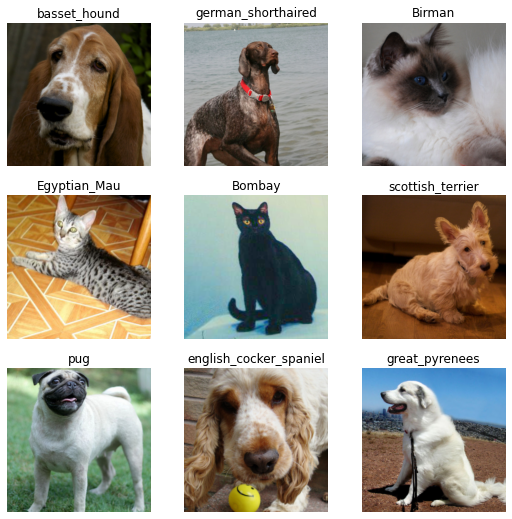

In [5]:
dls.show_batch(nrows=3, ncols=3)

In [6]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.986135,0.248054,0.085927,00:35


epoch,train_loss,valid_loss,error_rate,time
0,0.388435,0.256394,0.081191,00:41
1,0.280719,0.198976,0.060217,00:42
2,0.155089,0.166763,0.054127,00:42


In [7]:
interp = ClassificationInterpretation.from_learner(learn)

In [8]:
interp.most_confused(min_val=3)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 12),
 ('Ragdoll', 'Birman', 6),
 ('Siamese', 'Birman', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('basset_hound', 'beagle', 3),
 ('chihuahua', 'pomeranian', 3),
 ('english_cocker_spaniel', 'newfoundland', 3)]

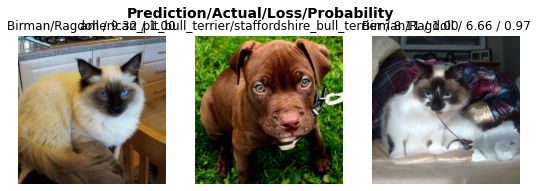

In [9]:
interp.plot_top_losses(k=3)

In [10]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.0010000000474974513)

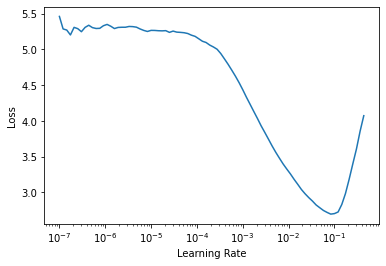

In [11]:
learn.lr_find()

In [13]:
learn.fine_tune(6, 0.001, freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,1.693889,0.325230,0.098106,00:34
1,0.664763,0.269412,0.090663,00:33
2,0.432030,0.244406,0.079161,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.243934,0.161627,0.053451,00:41
1,0.252828,0.209183,0.062923,00:41
2,0.198750,0.196021,0.060217,00:42
3,0.125246,0.187678,0.057510,00:42
4,0.079940,0.174811,0.048038,00:42
5,0.049820,0.173202,0.046685,00:42


This is a bit better than the error_rate of 0.054127 from the lesson. Can we get any lower?

In [14]:
learn.save("9epochs")

Path('models/9epochs.pth')

In [15]:
learn.load("9epochs")

SuggestedLRs(lr_min=1.9054606673307718e-05, lr_steep=7.585775847473997e-07)

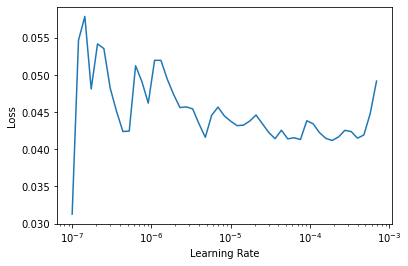

In [16]:
learn.lr_find()

In [18]:
learn.fit_one_cycle(1, lr_max=1.9054606673307718e-05)

epoch,train_loss,valid_loss,error_rate,time
0,0.054278,0.174032,0.044655,00:41


In [19]:
learn.save("10epochs")

Path('models/10epochs.pth')

In [20]:
learn.load("10epochs")

SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=1.0964781722577754e-06)

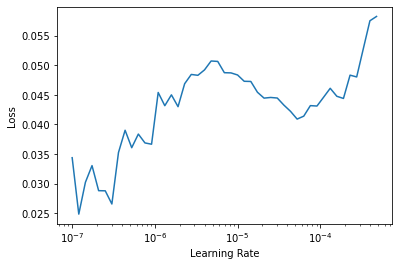

In [21]:
learn.lr_find()

In [22]:
learn.fit_one_cycle(1, 1.0964781722577754e-06)

epoch,train_loss,valid_loss,error_rate,time
0,0.041579,0.168521,0.043302,00:41
